In [1]:
from pyrpl import Pyrpl
from pyrpl.async_utils import sleep

import numpy as np

from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt

In [2]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()

In [3]:
p = Pyrpl(config="fiber_interferometer")
r = p.rp

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    C:\Users\Circular\pyrpl_user_dir\config\fiber_interferometer.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe fiber_interferometer" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('fiber_interferometer')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname 10.0.5.11.


In [40]:
r.scope.decimations

odict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536])

In [72]:
r.scope.input1 = 'in2'
r.scope.input2 = 'iq0'
r.scope.decimation = 32 # 128
r.scope.trigger_source = 'ch1_positive_edge'
r.scope.threshold = 0.244
r.scope.hysteresis = 0
r.scope.trace_average =1

r.asg0.waveform = 'sin'
r.asg0.offset = 0.5
r.asg0.amplitude = 0.5
r.asg0.frequency = 1.0e3
r.asg0.trigger_source = 'immediately'

r.iq0.input = 'in2'
r.iq0.output_direct = 'out2'
r.iq0.frequency = 1.0e3
r.iq0.acbandwidth = 6.071e2
r.iq0.bandwidth = [0, 1.186e0]
r.iq0.quadrature_factor = 1.75e2
r.iq0.gain = 5.1e2

INFO:pyrpl.modules:Calling setup() for scope.decimation ...


In [96]:
def run_experiment():
    trace = r.scope.curve_async()
    sleep(1)
    return trace.result()

def plot_results(transmission, demodulated_transmission):
    times = r.scope.times
    frequencies = fftfreq(times.size, d=times[1]-times[0])

    # transmission_ft = np.abs(fft(transmission))

    # modulation_frequency_index = find_nearest_index(frequencies, 1e3)

    # mean_error = np.mean(error)

    plt.plot(times, transmission)
    # plt.ylim(0.23, 0.27)
    plt.title("Laser Transmission Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    display(plt.show())

    plt.plot(times, demodulated_transmission)
    # plt.plot(times, np.full(times.size, mean_error))
    plt.ylim(-0.125, 0.125)
    plt.title("Demodulated Laser Transmission Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    display(plt.show())

    # plt.plot(frequencies / 1e3, transmission_ft / np.sum(transmission_ft))
    # plt.xlim(0.5, 1.5)
    # plt.ylim(0, 0.05)
    # plt.title("Laser Transmission Spectrum")
    # plt.xlabel("Frequency $f/f_m$")
    # plt.ylabel("Amplitude")
    # display(plt.show())

    # print(mean_error)
    # print(frequencies[modulation_frequency_index], transmission_ft[modulation_frequency_index])

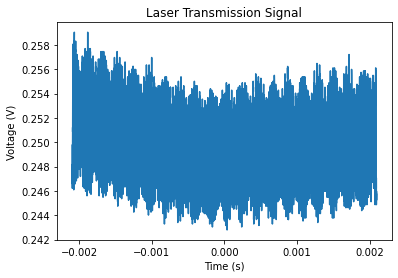

None

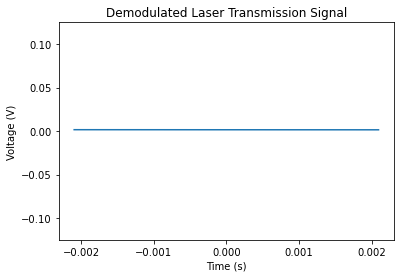

None

In [80]:
r.asg0.output_direct = 'off'

transmission, demodulated_transmission = run_experiment()

plot_results(transmission, demodulated_transmission)

In [81]:
with open('short_times.npy', 'wb') as f:
    np.save(f, r.scope.times)

In [82]:
with open('experimental_short_unmodulated_transmission.npy', 'wb') as f:
    np.save(f, transmission)

with open('experimental_short_unmodulated_demodulated_transmission.npy', 'wb') as f:
    np.save(f, demodulated_transmission)

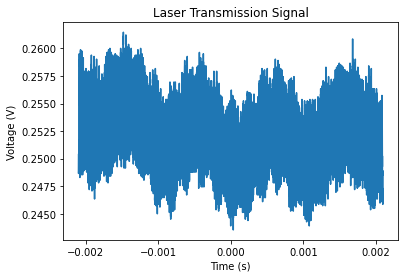

None

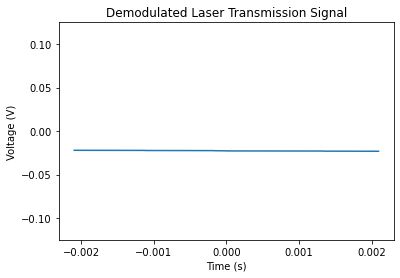

None

In [119]:
r.asg0.output_direct = 'out1'

transmission, demodulated_transmission = run_experiment()
plot_results(transmission, demodulated_transmission)

In [116]:
with open('experimental_short_negative_modulated_transmission.npy', 'wb') as f:
    np.save(f, transmission)

with open('experimental_short_negative_modulated_demodulated_transmission.npy', 'wb') as f:
    np.save(f, demodulated_transmission)